Rafał Nowak
# Numerical Optimization
## Problem set 1 (30 points)

**Submission deadline**: Tuesday, 22.10.19

* All submissions should contain single file.<br/>This can be single Jupyter notebook file (with extension `ipynb`) or ZIP archive in case the are some additional files needed.
* It is recommended to write the reports using LaTeX. 
* One can report the answers, comments and results in PDF or notebook file.
* All the source code should be written in Python or Julia.

### Szymon Czop 292913

**Problem 1.1 (10 pts)**

In this problem you are going to solve the system of linear equations $Ax=b$, where $A\in \mathbb R^{n\times n}$, $b\in\mathbb R^n$ are given.

1. Implement the [Gauss elimination algorithm](https://www.wikiwand.com/en/Gaussian_elimination) that solves the system $Ax=b$. 
> `x = solve(A,b)`
2. Test your algorithm with built-in solver (see [`\`](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Base.:\-Tuple{AbstractArray{T,2}%20where%20T,Union{AbstractArray{T,1},%20AbstractArray{T,2}}%20where%20T}) in Julia for example).<br/>
One can perform the tests by taking $b := Ax$ for somehow generated vector (solution) $x\in\mathbb R^n$.
3. Experiment with different kind of matrices $A$: symmetric, (2,3-)diagonal, hermitian, positive definite, ..., 

In [6]:
import numpy as np 
def solve(A,beta,scizor = False):
    A = A.astype(float)
    rows,col = A.shape
    if rows > col:
        pom_A  = A
        pom_beta  = beta
        scizor = True
        A = A[:col,:]
        beta = beta[:col] 
    
    
    X = np.hstack([A,beta.reshape(-1,1)]) 
    dim = X.shape[0] 
    
    while A[1,1] ==0: 
        A = A[np.random.permutation(np.arange(dim)),:]
    
    
    for i in range(dim): 
        a = X[i]
        for j in range(i+1,dim):
            b = X[j]
            mnoznik = b[i]/a[i]
            X[j] = b - mnoznik*a
            
    if b[j]==0 and b[j+1] != 0: 
        raise ValueError('Układ jest sprzeczny')
        
    X = X[~np.all(X == 0, axis=1)]
    dim = X.shape[0]
    
    for i in range(dim-1,-1,-1):
        a = X[i]
        X[i] = X[i]/X[i,i]
        for j in range(i -1,-1,-1):
            b = X[j]
            mnoznik_2= b[i]/a[i]
            X[j] = b - mnoznik_2*a
    
    if scizor == True:
        beta2 = pom_beta[col:]
        rozw = X[:,-1]
        if sum(pom_A[dim:,:] @ rozw == beta2) != len(beta2):
            raise ValueError('Układ jest sprzeczny')
            
        
    
    return X

Code that I wrote is solving problem for most kind of matrices. 

At the first stage program is checking weather or not we have more rows then columns($A_{m x n} m>n$), 
if so im cutting this object to square matrix, in other case nothing changes. 
Then I'm binding matrix $ A$ with vector of responses$ b$ and create matrix $X = [A,b]$

To start my algorithm i need to have a value different that zero on the top right corner so I'm permuting my rows until non-zero value appears in this place.

Than iI want all values to in first column to be zero (except first row), then i repeat it until I have upper-triangle matrix. After this I check if any zero rows appear, if so, I'm deleting them and I know that my system of equations has conditional solutions. On the other hand I'm checking if there is situation that  one of the rows in right side of equation (only previous $A$ part) is equal to zero but the left side ($b$) is not. It that case i have  contradictory system of equations and program will show error.  

After that im eliminating other values in rows to get  diagonal matrix. On diagonals, there should be only ones so it's easy to see what is a value of certain variable. If my system of equations is has conditional then output won't be diagonal matrix but one that can be parametrized in proper way. For the case when I have more rows then columns I'm checking my solution for the rest of the rows, if one of them is different I raise value error

# Tests

Test. Sorry Im not after CS study so my tests are not so complicated (but i'm keen to learn how to make those!) but I tried to cover some of them  in given examples.

On diagonal matrix (randomly generated x)

In [8]:
A = np.diag(np.arange(1,11))
x = np.random.rand(10)*10 -5
beta = (A @ x).reshape(1,-1) # musi być podawane jako wektor poziomy nie pionowy 

solution = solve(A,beta)
err = sum((solution[:,-1] - x)**2)
solution[:,-1],err

(array([-1.29506261, -0.13686072,  4.77249725, -3.00377373,  0.48858399,
         2.52206109,  2.96365655,  4.6472396 , -3.0888677 ,  0.12723991]), 0.0)

On symmetric matrix (random x and A)

In [9]:
A = np.random.randint(1000,size = (5,5))
A = A + A.T - np.diag(A.diagonal())
x = np.random.rand(5)*100 -20
beta = (A @ x).reshape(1,-1)
solution = solve(A,beta)
err = sum((solution[:,-1] - x)**2)
solution[:,-1],err

(array([-0.03355632, -8.26945082, -0.85044268,  4.7405376 , 23.0568342 ]),
 4.2673629472049143e-26)

5x2 Matrix with no solution 

In [10]:
A =  np.array([[60, 91], [60, 3], [45, 90],[32,12],[3,2]], dtype='float') #  nie wiem jak będzie zachowywać sie tutaj :
beta = np.array([1, 0, 0,2,7])
solve(A,beta)

ValueError: Układ jest sprzeczny

5x2 Matrix with existing solution

In [12]:
A = np.array([[1,1],[2,1],[1,2],[1,-1]],dtype = 'float')
beta = np.array([5, 7, 8,-1])
solve(A,beta)[:,-1]

array([2., 3.])

Infinity number  of solutions

In [22]:
A = np.array([[1,3,1],[1,1,-1],[3,11,5]])
beta = np.array([9,1,35])
solve(A,beta)

array([[ 1.,  0., -2., -3.],
       [-0.,  1.,  1.,  4.]])

Positive-define Matrix 

In [15]:
A = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
x = np.random.rand(3)*200 -100
beta = (A @ x).reshape(1,-1)
solution = solve(A,beta)
err = sum((solution[:,-1] - x)**2)
solution[:,-1],err

(array([-84.48214223,  82.6887583 , -94.87058607]), 0.0)

**Problem 1.2 (5 pts)**

Consider the following linear problem:
```
    maximize     2x+2y+z
    
                 | 1 1 1 |   | x |     | 5 |
    subject to   | 1 1 0 | * | y |  <= | 4 |
                 | 0 0 1 |   | z |     | 4 |
                 
                 x, y, z >= 0
```
* Plot the 3D polytope defined be the constraints. What is the number of vertices?
* Solve the LP.

subject to can be rewrite as 
$$x + y + z <= 5$$
$$x + y       <= 4$$
$$z <=4$$


To solve the LP problem we need to check ale vertices of this figure and check which one is maximizing upon given function. 

All vetices comes as follow $\{(0,0,0),(4,0,0),(0,4,0),(4,0,1),(0,4,1),(0,0,4),(1,0,4),(0,1,4)\}$

The one that maximize our goal function $f(x) = c^Tx $ is $(4,0,1)$ or $(0,1,4)$ both of them give us 9 as reachable maximum.

 #### Please load it for the outcome !!!

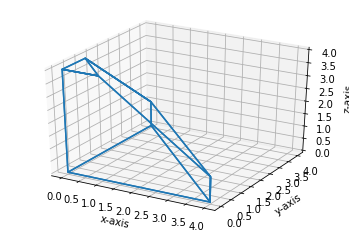

In [24]:
from mpl_toolkits.mplot3d import axes3d,art3d
import  matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline

figure = plt.figure()
axis = figure.add_subplot(111, projection = '3d')

x = [0,4,4,1,0,0,0,0,0,0,1,0,0,4,4,0]
y = [0,0,0,0,0,1,4,4,0,0,0,1,4,0,0,4]
z = np.array([[0,0,1,4,4,4,1,0,0,4,4,4,1,1,0,0],[0,0,1,4,4,4,1,0,0,4,4,4,1,1,0,0]])

axis.plot_wireframe(x, y, z)

axis.set_xlabel('x-axis')
axis.set_ylabel('y-axis')
axis.set_zlabel('z-axis')

plt.show()


**Problem 1.3 (10 pts)**

Implement the simplex algorithm solving the problem
```
   minimize c^T x
   subject to Ax = b and x >= 0
```
You can assume that the initial *feasible base* (see [BFS](https://www.wikiwand.com/en/Basic_feasible_solution)) $I$ is given.<br/>
Your function should output the optimal value and the minimizer $x$.

In [0]:
function simplex_method(I, c, A, b)
    # write your implementation here
    # ...
    # return v, x
end

**Problem 1.4 (5 pts)**

In the previous algorithm you may have probably observed a lot of inverse operations.

This task is to implement *revised simplex algorithm* with incremental A inverse computation 
by using the **[Sherman-Morrison](https://www.wikiwand.com/en/Sherman%E2%80%93Morrison_formula)** formula for keeping track of the inverse matrix.

Your program will be graded based on how fast it is.
You should expect to see a factor 10-20 speedup depending on the problem instance.

In [0]:
function revised_simplex_method(I, c, A, b)
    # write your implementation here
    # ...
    return # v, x
end

---

*Hint* You can test your code by using the `test-data.jld` archive containing the simple dictionary of data ( to jest tylko julia i trzeba znaleźć coś nowego żeby pytong to przeczytał)
```julia
using JLD, LinearAlgebra
dataset = JLD.load("test_data.jld")["data"]

method = simplex_method

for test_id=1:30
    data = dataset[test_id]
    I,A,b,c,f,x = data["I"], data["A"], data["b"], data["c"], data["f"], data["x"]
    v1,x1 = method(I, c, A, b)
    if LinearAlgebra.norm(x1-x) < 1e-10
        # :-)
    else
        # :-(
    end
end
```

Repeat the test with `method = revised_simplex_method` and compare the time elapsed for both method.